https://medium.com/@erikhallstrm/using-the-tensorflow-lstm-api-3-7-5f2b97ca6b73

In [5]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [4]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [8]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

cell_state = tf.placeholder(tf.float32, [batch_size, state_size])
hidden_state = tf.placeholder(tf.float32, [batch_size, state_size])
init_state = tf.nn.rnn_cell.LSTMStateTuple(cell_state, hidden_state)

W2 = tf.Variable(np.random.rand(state_size, num_classes), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1, num_classes)), dtype=tf.float32)

In [12]:
input_series = tf.split(batchX_placeholder, truncated_backprop_length, 1)
label_series = tf.unstack(batchY_placeholder, axis=1)

cell = tf.nn.rnn_cell.BasicLSTMCell(state_size, state_is_tuple=True)
state_series, current_state = rnn.static_rnn(cell, input_series, init_state)

logit_series = [tf.matmul(state, W2) + b2 for state in state_series]
prediction_series = [tf.nn.softmax(logits=logits) for logits in logit_series]

loss = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logit_series, label_series)]
total_loss = tf.reduce_mean(loss)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [13]:
def plot(loss_list, prediction_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(prediction_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

New data, epoch 0
Step 0 Batch loss 0.694563
Step 100 Batch loss 0.610292
Step 200 Batch loss 0.487545
Step 300 Batch loss 0.408737
Step 400 Batch loss 0.210181
Step 500 Batch loss 0.253589
Step 600 Batch loss 0.312975
New data, epoch 1
Step 0 Batch loss 0.282063
Step 100 Batch loss 0.0157269
Step 200 Batch loss 0.00790108
Step 300 Batch loss 0.00519591
Step 400 Batch loss 0.00332272
Step 500 Batch loss 0.00237357
Step 600 Batch loss 0.00246647
New data, epoch 2
Step 0 Batch loss 0.558479
Step 100 Batch loss 0.00268293
Step 200 Batch loss 0.00241618
Step 300 Batch loss 0.00217882
Step 400 Batch loss 0.00160481
Step 500 Batch loss 0.00168295
Step 600 Batch loss 0.00142572
New data, epoch 3
Step 0 Batch loss 0.352368
Step 100 Batch loss 0.00104225
Step 200 Batch loss 0.00133262
Step 300 Batch loss 0.00100283
Step 400 Batch loss 0.000944667
Step 500 Batch loss 0.000888791
Step 600 Batch loss 0.000821529
New data, epoch 4
Step 0 Batch loss 0.329568
Step 100 Batch loss 0.00080103
Step 200 B

Step 500 Batch loss 0.000109373
Step 600 Batch loss 9.5997e-05
New data, epoch 35
Step 0 Batch loss 0.317073
Step 100 Batch loss 0.000100893
Step 200 Batch loss 0.000103303
Step 300 Batch loss 9.97783e-05
Step 400 Batch loss 0.000107708
Step 500 Batch loss 8.47866e-05
Step 600 Batch loss 9.54057e-05
New data, epoch 36
Step 0 Batch loss 0.39037
Step 100 Batch loss 8.31394e-05
Step 200 Batch loss 0.000103642
Step 300 Batch loss 9.40173e-05
Step 400 Batch loss 0.000100845
Step 500 Batch loss 9.17118e-05
Step 600 Batch loss 0.000107018
New data, epoch 37
Step 0 Batch loss 0.190701
Step 100 Batch loss 0.00012627
Step 200 Batch loss 0.000126228
Step 300 Batch loss 0.000104261
Step 400 Batch loss 8.65217e-05
Step 500 Batch loss 0.000117525
Step 600 Batch loss 8.45328e-05
New data, epoch 38
Step 0 Batch loss 0.423657
Step 100 Batch loss 9.72778e-05
Step 200 Batch loss 7.37179e-05
Step 300 Batch loss 9.97754e-05
Step 400 Batch loss 8.47274e-05
Step 500 Batch loss 6.83105e-05
Step 600 Batch loss

Step 200 Batch loss 6.43883e-05
Step 300 Batch loss 6.06982e-05
Step 400 Batch loss 6.21447e-05
Step 500 Batch loss 5.3311e-05
Step 600 Batch loss 5.4311e-05
New data, epoch 70
Step 0 Batch loss 0.274654
Step 100 Batch loss 6.48015e-05
Step 200 Batch loss 6.54884e-05
Step 300 Batch loss 4.67391e-05
Step 400 Batch loss 7.4379e-05
Step 500 Batch loss 5.90215e-05
Step 600 Batch loss 5.6545e-05
New data, epoch 71
Step 0 Batch loss 0.147232
Step 100 Batch loss 5.76386e-05
Step 200 Batch loss 4.87339e-05
Step 300 Batch loss 5.4042e-05
Step 400 Batch loss 5.89689e-05
Step 500 Batch loss 5.3502e-05
Step 600 Batch loss 5.35592e-05
New data, epoch 72
Step 0 Batch loss 0.125985
Step 100 Batch loss 5.32618e-05
Step 200 Batch loss 6.01761e-05
Step 300 Batch loss 6.29022e-05
Step 400 Batch loss 5.39438e-05
Step 500 Batch loss 6.06566e-05
Step 600 Batch loss 5.86273e-05
New data, epoch 73
Step 0 Batch loss 0.236732
Step 100 Batch loss 5.7942e-05
Step 200 Batch loss 5.61608e-05
Step 300 Batch loss 5.3

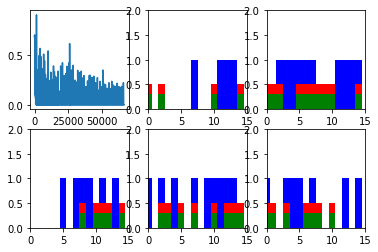

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_cell_state = np.zeros((batch_size, state_size))
        _current_hidden_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _prediction_series = sess.run(
                [total_loss, train_step, current_state, prediction_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    cell_state: _current_cell_state,
                    hidden_state: _current_hidden_state

                })

            _current_cell_state, _current_hidden_state = _current_state

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Batch loss", _total_loss)
                plot(loss_list, _prediction_series, batchX, batchY)

plt.ioff()
plt.show()